In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format='{:,.2f}'.format

In [2]:
#Importing Companies
companies = pd.read_csv("C://Users//nanda//Desktop//ML&AI//First_Case_Study//companies.txt", sep="\t", encoding = "ISO-8859-1")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
#Importing rounds2
rounds2 = pd.read_csv("C://Users//nanda//Desktop//ML&AI//First_Case_Study//rounds2.csv", encoding = "ISO-8859-1")
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00"
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00"
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00"


In [4]:
#Converting permalink to Lower Case
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()
companies['permalink']=companies['permalink'].str.lower()

In [5]:
#unique values in rounds2
rounds2.agg(['nunique','size','count'])

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
nunique,66370,114949,14,8,5033,22095
size,114949,114949,114949,114949,114949,114949
count,114949,114949,114949,31140,114949,94959


In [6]:
#unique values in companies
companies.agg(['nunique','size','count'])

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
nunique,66368,66102,61191,27296,4,137,311,1092,5111,3978
size,66368,66368,66368,66368,66368,66368,66368,66368,66368,66368
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147


In [7]:
#generating master_frame
master_frame=pd.merge(rounds2,companies,how='left',left_on='company_permalink',right_on='permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00",/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [8]:
#Total count after merge
master_frame.shape

(114949, 16)

In [9]:
#finding nulls in rounds2
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [11]:
#removing nulls from raised amount column
rounds2=rounds2[~np.isnan(rounds2['raised_amount_usd'])]

In [12]:
#grouping on round_type
round=rounds2.groupby('funding_round_type')
#mean of total investment in each sector
df=pd.DataFrame(round['raised_amount_usd'].mean())
df

,raised_amount_usd
funding_round_type,
angel,"958,694.47"
convertible_note,"1,453,438.54"
debt_financing,"17,043,526.02"
equity_crowdfunding,"538,368.21"
grant,"4,300,576.34"
non_equity_assistance,"411,203.05"
post_ipo_debt,"168,704,571.82"
post_ipo_equity,"82,182,493.87"
private_equity,"73,308,593.03"


In [13]:
#finding the right FT type
df['Eligible']=df['raised_amount_usd'].apply(lambda x: 5000000<=x<=15000000)
df

,raised_amount_usd,Eligible
funding_round_type,,
angel,"958,694.47",False
convertible_note,"1,453,438.54",False
debt_financing,"17,043,526.02",False
equity_crowdfunding,"538,368.21",False
grant,"4,300,576.34",False
non_equity_assistance,"411,203.05",False
post_ipo_debt,"168,704,571.82",False
post_ipo_equity,"82,182,493.87",False
private_equity,"73,308,593.03",False


In [14]:
#filtering desired FT
mdf=master_frame[master_frame['funding_round_type']=='venture']

In [15]:
#removing nulls from raised amount
mdf=mdf[~np.isnan(mdf['raised_amount_usd'])]

In [16]:
#grouping on country
top=mdf.groupby('country_code')
tf=pd.DataFrame(top['raised_amount_usd'].sum())

In [17]:
#getting top 9 countries
top9=pd.DataFrame(tf.sort_values('raised_amount_usd').tail(9))
top9.head(10)

,raised_amount_usd
country_code,
JPN,"3,363,676,611.00"
DEU,"6,346,959,822.00"
ISR,"6,907,514,579.00"
FRA,"7,259,536,732.00"
CAN,"9,583,332,317.00"
IND,"14,391,858,718.00"
GBR,"20,245,627,416.00"
CHN,"39,835,418,773.00"
USA,"422,510,842,796.00"


In [18]:
#reading mappings
mapping = pd.read_csv("C://Users//nanda//Desktop//ML&AI//First_Case_Study//mapping.csv", encoding = "ISO-8859-1")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [160]:
#Clean Mapping Dataset
mapping['category_list']= mapping['category_list'].str.replace('0notechnology','Nanotechnology')
mapping['category_list']= mapping['category_list'].str.replace('0tural','Natural')
mapping['category_list']= mapping['category_list'].str.replace('0vigation','Navigation')
mapping['category_list']= mapping['category_list'].str.replace('0','na')
mapping['category_list']= mapping['category_list'].str.replace('Enterprise 2.na','Enterprise 2.0')

In [161]:
#mapping main sectors to categories
map=pd.melt(mapping,id_vars=['category_list'],var_name=['Automotive & Sports'],value_name='value')
mapped=pd.DataFrame(map[map['value']==1])
mapped = mapped.rename(columns={'Automotive & Sports': 'Main_Sector'})
mapped=mapped[['category_list','Main_Sector']]

In [162]:
#editing category list
master_frame['category_list']=master_frame['category_list'].str.split('|').str[0]


In [163]:
#merging main sectors with category list
master_mapped=pd.merge(master_frame,mapped,how='left',left_on='category_list',right_on='category_list')
master_frame=master_frame[~np.isnan(master_frame['raised_amount_usd'])]

In [164]:
#getting c3 records
m1=pd.DataFrame(master_mapped[(master_mapped['country_code']=='IND')])
m1=m1[(m1['funding_round_type']=='venture')]
m1=m1[(m1['raised_amount_usd']>= 5000000)& (m1['raised_amount_usd'] <= 15000000)]
m1.shape

(330, 17)

In [165]:
#getting c2 records
m2=pd.DataFrame(master_mapped[(master_mapped['country_code']=='GBR')])
m2=m2[(m2['funding_round_type']=='venture')]
m2=m2[(m2['raised_amount_usd']>= 5000000)& (m2['raised_amount_usd'] <= 15000000)]
m2.shape

(628, 17)

In [166]:
#getting C1 records
m3=pd.DataFrame(master_mapped[(master_mapped['country_code']=='USA')])
m3=m3[(m3['funding_round_type']=='venture')]
m3=m3[(m3['raised_amount_usd']>= 5000000)& (m3['raised_amount_usd'] <= 15000000)]
m3.shape

(12150, 17)

In [30]:
#Total Amount invested in C3
m1['raised_amount_usd'].sum()
#Total Count of investment in C3
m1['raised_amount_usd'].count()
#Total Amount invested in C2
m2['raised_amount_usd'].sum()
#Total Count of investment in C2
m2['raised_amount_usd'].count()
#Total Amount invested in C1
m3['raised_amount_usd'].sum()
#Total Count of investment in C2
m3['raised_amount_usd'].count()

12150

In [31]:
#finding total no of investments and sum for C3
gp=m1.groupby('Main_Sector')
g1=pd.DataFrame(gp['raised_amount_usd'].count())
g1 = g1.rename(columns={'raised_amount_usd': 'CountOfInvestmentInSector'})
g1['SumOfInvestmentInSector']=gp['raised_amount_usd'].sum()
g1


,CountOfInvestmentInSector,SumOfInvestmentInSector
Main_Sector,,
Automotive & Sports,13,"136,900,000.00"
Blanks,2,"27,000,000.00"
Cleantech / Semiconductors,20,"165,380,000.00"
Entertainment,33,"280,830,000.00"
Health,19,"167,740,000.00"
Manufacturing,21,"200,900,000.00"
"News, Search and Messaging",52,"433,834,545.00"
Others,110,"1,013,409,507.00"
"Social, Finance, Analytics, Advertising",60,"550,549,550.00"


In [32]:
#for C2
gp=m2.groupby('Main_Sector')
g2=pd.DataFrame(gp['raised_amount_usd'].count())
g2 = g2.rename(columns={'raised_amount_usd': 'CountOfInvestmentInSector'})
g2['SumOfInvestmentInSector']=gp['raised_amount_usd'].sum()
g2

,CountOfInvestmentInSector,SumOfInvestmentInSector
Main_Sector,,
Automotive & Sports,16,"167,051,565.00"
Blanks,7,"57,764,848.00"
Cleantech / Semiconductors,130,"1,163,990,056.00"
Entertainment,56,"482,784,687.00"
Health,24,"214,537,510.00"
Manufacturing,42,"361,940,335.00"
"News, Search and Messaging",73,"615,746,235.00"
Others,147,"1,283,624,289.00"
"Social, Finance, Analytics, Advertising",133,"1,089,404,014.00"


In [33]:
#for C1
gp=m3.groupby('Main_Sector')
g3=pd.DataFrame(gp['raised_amount_usd'].count())
g3= g3.rename(columns={'raised_amount_usd': 'CountOfInvestmentInSector'})
g3['SumOfInvestmentInSector']=gp['raised_amount_usd'].sum()
g3

,CountOfInvestmentInSector,SumOfInvestmentInSector
Main_Sector,,
Automotive & Sports,167,"1,454,104,361.00"
Blanks,86,"764,763,292.00"
Cleantech / Semiconductors,2350,"21,633,430,822.00"
Entertainment,591,"5,099,197,982.00"
Health,909,"8,211,859,357.00"
Manufacturing,799,"7,258,553,378.00"
"News, Search and Messaging",1583,"13,971,567,428.00"
Others,2950,"26,321,007,002.00"
"Social, Finance, Analytics, Advertising",2714,"23,807,376,964.00"


In [159]:
#top company in second top sector with max investment
#C3
h1=pd.DataFrame(m1[m1['Main_Sector']=='Social, Finance, Analytics, Advertising'])
h1.sort_values(by='raised_amount_usd',ascending='False').tail(1)
#C2
h1=pd.DataFrame(m2[m2['Main_Sector']=='Social, Finance, Analytics, Advertising'])
h1.sort_values(by='raised_amount_usd',ascending='False').tail(1)
#C1
h1=pd.DataFrame(m3[m3['Main_Sector']=='Social, Finance, Analytics, Advertising'])
h1.sort_values(by='raised_amount_usd',ascending='False').tail(1)
#top company in top sector with max investment
#C3
h1=pd.DataFrame(m1[m1['Main_Sector']=='Others'])
h1.sort_values(by='raised_amount_usd',ascending='False').tail(1)
#C2
h1=pd.DataFrame(m2[m2['Main_Sector']=='Others'])
h1.sort_values(by='raised_amount_usd',ascending='False').tail(1)
#C1
h1=pd.DataFrame(m3[m3['Main_Sector']=='Others'])
h1.sort_values(by='raised_amount_usd',ascending='False').tail(1)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Main_Sector
31645,/organization/endeca,/funding-round/002b802a4c38b896fd1fe3d9f425b4cb,venture,B,01-11-2001,"15,000,000.00",/organization/endeca,Endeca,http://endeca.com,E-Commerce,acquired,USA,MA,Boston,Cambridge,NaN,Others


In [34]:
#creating d1,d2,d3
d3=pd.merge(m1,g1,how='left',left_on='Main_Sector',right_on='Main_Sector')
#d3.head()
d2=pd.merge(m2,g2,how='left',left_on='Main_Sector',right_on='Main_Sector')
#d2.head()
d1=pd.merge(m3,g3,how='left',left_on='Main_Sector',right_on='Main_Sector')
#d1.head()

In [38]:
#plot 2
p2=pd.DataFrame(master_frame[(master_frame['funding_round_type']=='venture')&((master_frame['country_code']=='USA')|(master_frame['country_code']=='IND')|(master_frame['country_code']=='GBR')|(master_frame['country_code']=='CAN')|(master_frame['country_code']=='CHN')|(master_frame['country_code']=='FRA')|(master_frame['country_code']=='DEU')|(master_frame['country_code']=='JPN')|(master_frame['country_code']=='ISR'))])

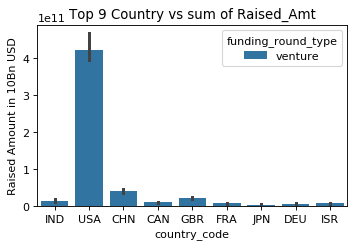

In [39]:
plt.figure(num=None, figsize=(5,3), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='country_code',y='raised_amount_usd',hue='funding_round_type',data=p2,estimator=np.sum)
plt.title('Top 9 Country vs sum of Raised_Amt')
plt.ylabel('Raised Amount in 10Bn USD')
plt.show()

In [40]:
#plot 3
p3=pd.DataFrame(master_mapped[(master_mapped['funding_round_type']=='venture') & (((master_mapped['country_code']=='USA')&(master_mapped['Main_Sector']=='Others'))|((master_mapped['country_code']=='GBR')&(master_mapped['Main_Sector']=='Others'))|((master_mapped['country_code']=='IND')&(master_mapped['Main_Sector']=='Others'))|((master_mapped['country_code']=='USA')&(master_mapped['Main_Sector']=='Social, Finance, Analytics, Advertising'))|((master_mapped['country_code']=='GBR')&(master_mapped['Main_Sector']=='Social, Finance, Analytics, Advertising'))|((master_mapped['country_code']=='IND')&(master_mapped['Main_Sector']=='Social, Finance, Analytics, Advertising'))|((master_mapped['country_code']=='USA')&(master_mapped['Main_Sector']=='Cleantech / Semiconductors'))|((master_mapped['country_code']=='GBR')&(master_mapped['Main_Sector']=='Cleantech / Semiconductors'))|((master_mapped['country_code']=='IND')&(master_mapped['Main_Sector']=='News, Search and Messaging')))])
p3['Invest_count']=1

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Main_Sector,Invest_count
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Others,1
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising",1
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising",1
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,"Social, Finance, Analytics, Advertising",1
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,"4,000,000.00",/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013,Others,1


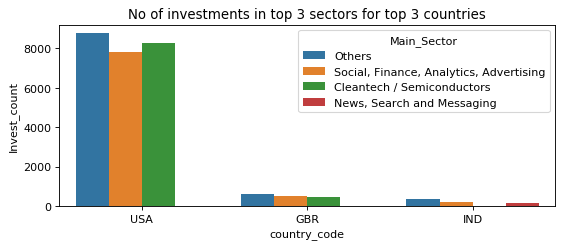

In [41]:
plt.figure(num=None, figsize=(8,3), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='country_code',y='Invest_count',hue='Main_Sector',data=p3,estimator=np.sum)
plt.title('No of investments in top 3 sectors for top 3 countries')
plt.show()

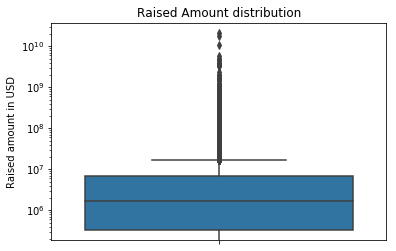

In [42]:
sns.boxplot(y=rounds2['raised_amount_usd'])
plt.yscale('log')
plt.title('Raised Amount distribution')
plt.ylabel('Raised amount in USD')
plt.show()
#sns.boxplot(rounds2['raised_amount_usd'])

In [132]:
#Plot 1
p4=pd.DataFrame(master_mapped[(master_mapped['funding_round_type']=='venture')|(master_mapped['funding_round_type']=='seed')|(master_mapped['funding_round_type']=='private_equity')])
p4=p4[~np.isnan(p4['raised_amount_usd'])]

In [133]:
q4=p4.groupby('funding_round_type')
p5=pd.DataFrame(q4['raised_amount_usd'].sum())
p5['Total_Fund_Raised_Inall']=master_mapped['raised_amount_usd'].sum()
p5['Fraction of Investment']=p5['raised_amount_usd']/p5['Total_Fund_Raised_Inall']
p5['Fraction of Investment']=p5['Fraction of Investment']*100

,raised_amount_usd
funding_round_type,
private_equity,"141,925,436,105.00"
seed,"16,989,864,181.00"
venture,"590,126,216,876.00"


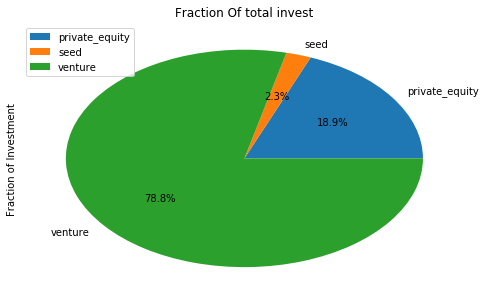